In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/weatherAUS.csv')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [ ]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [ ]:
df1 = df.drop(['Date'],axis=1)
df1

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


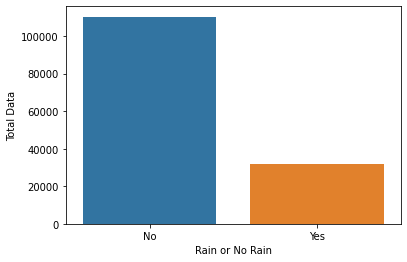

In [ ]:
sns.countplot(x='RainToday', data=df1)
plt.xlabel('Rain or No Rain')
plt.ylabel('Total Data')
plt.show()

In [ ]:
#Checking for missing values
df1.isnull().sum(), df1.shape

(Location             0
 MinTemp           1485
 MaxTemp           1261
 Rainfall          3261
 Evaporation      62790
 Sunshine         69835
 WindGustDir      10326
 WindGustSpeed    10263
 WindDir9am       10566
 WindDir3pm        4228
 WindSpeed9am      1767
 WindSpeed3pm      3062
 Humidity9am       2654
 Humidity3pm       4507
 Pressure9am      15065
 Pressure3pm      15028
 Cloud9am         55888
 Cloud3pm         59358
 Temp9am           1767
 Temp3pm           3609
 RainToday         3261
 RainTomorrow      3267
 dtype: int64, (145460, 22))

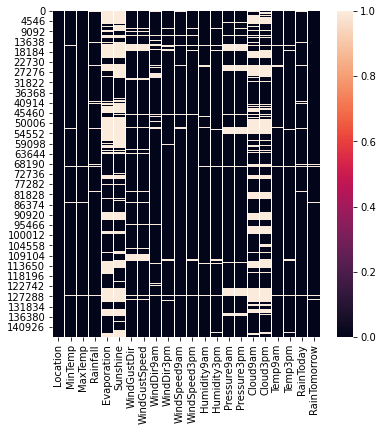

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(data=df1.isnull())

<h4> As we can see there is too much missing values </h4>

In [ ]:
#describing the data
df1.describe().T.style.bar()

,count,mean,std,min,25%,50%,75%,max
MinTemp,143975.000000,12.194034,6.398495,-8.500000,7.600000,12.000000,16.900000,33.900000
MaxTemp,144199.000000,23.221348,7.119049,-4.800000,17.900000,22.600000,28.200000,48.100000
Rainfall,142199.000000,2.360918,8.478060,0.000000,0.000000,0.000000,0.800000,371.000000
Evaporation,82670.000000,5.468232,4.193704,0.000000,2.600000,4.800000,7.400000,145.000000
Sunshine,75625.000000,7.611178,3.785483,0.000000,4.800000,8.400000,10.600000,14.500000
WindGustSpeed,135197.000000,40.035230,13.607062,6.000000,31.000000,39.000000,48.000000,135.000000
WindSpeed9am,143693.000000,14.043426,8.915375,0.000000,7.000000,13.000000,19.000000,130.000000
WindSpeed3pm,142398.000000,18.662657,8.809800,0.000000,13.000000,19.000000,24.000000,87.000000
Humidity9am,142806.000000,68.880831,19.029164,0.000000,57.000000,70.000000,83.000000,100.000000
Humidity3pm,140953.000000,51.539116,20.795902,0.000000,37.000000,52.000000,66.000000,100.000000


In [ ]:
for x in df1.columns:
    if df1[x].dtype in ['object']:    #dtype means datatype
        print(f"{x}:{df1[x].unique()}")

Location:['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
WindGustDir:['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']
WindDir9am:['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']
WindDir3pm:['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']
RainToday:['No' 'Yes' nan]
RainTomorrow:['No' 'Yes' nan]


As we can see, there are 6 features which are object type.

In [ ]:
#we will convert RainToday and RainTomorrow dtype
df1.RainToday.replace(('Yes', 'No'), (1, 0), inplace=True)
df1.RainTomorrow.replace(('Yes', 'No'), (1, 0), inplace=True)
df1.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0.0
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0.0
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0.0
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0.0
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0.0


Filling the missing values

In [ ]:
df1['Evaporation'].describe()

count    82670.000000
mean         5.468232
std          4.193704
min          0.000000
25%          2.600000
50%          4.800000
75%          7.400000
max        145.000000
Name: Evaporation, dtype: float64

In [ ]:
df1['Sunshine'].describe()

count    75625.000000
mean         7.611178
std          3.785483
min          0.000000
25%          4.800000
50%          8.400000
75%         10.600000
max         14.500000
Name: Sunshine, dtype: float64

In [ ]:
df1['Cloud3pm'].describe(), df1['Cloud9am'].describe()

(count    86102.000000
 mean         4.509930
 std          2.720357
 min          0.000000
 25%          2.000000
 50%          5.000000
 75%          7.000000
 max          9.000000
 Name: Cloud3pm, dtype: float64, count    89572.000000
 mean         4.447461
 std          2.887159
 min          0.000000
 25%          1.000000
 50%          5.000000
 75%          7.000000
 max          9.000000
 Name: Cloud9am, dtype: float64)

In [ ]:
df1['Pressure9am'].describe(), df1['Pressure3pm'].describe()

(count    130395.00000
 mean       1017.64994
 std           7.10653
 min         980.50000
 25%        1012.90000
 50%        1017.60000
 75%        1022.40000
 max        1041.00000
 Name: Pressure9am, dtype: float64, count    130432.000000
 mean       1015.255889
 std           7.037414
 min         977.100000
 25%        1010.400000
 50%        1015.200000
 75%        1020.000000
 max        1039.600000
 Name: Pressure3pm, dtype: float64)

In [ ]:
from sklearn.impute import SimpleImputer
imputer1 = SimpleImputer(missing_values=np.nan, strategy='mean')
df1[['Evaporation']] = imputer1.fit_transform(df1[['Evaporation']])
df1[['Sunshine']] = imputer1.fit_transform(df1[['Sunshine']])
df1[['Cloud3pm']] = imputer1.fit_transform(df1[['Cloud3pm']])
df1[['Cloud9am']] = imputer1.fit_transform(df1[['Cloud9am']])
df1[['Pressure9am']] = imputer1.fit_transform(df1[['Pressure9am']])
df1[['Pressure3pm']] = imputer1.fit_transform(df1[['Pressure3pm']])

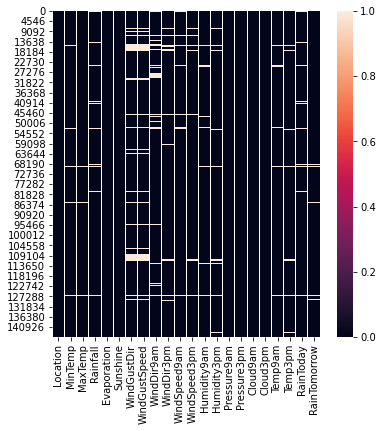

In [ ]:
plt.figure(figsize=(6,6))
sns.heatmap(data=df1.isnull())

In [ ]:
#Now we can drop missing values and encode categricals
df1 = df1.dropna()

#encoding categorical variables to numeric ones
from sklearn.preprocessing import LabelEncoder
for c in df1.columns:
    if df1[c].dtype=='object':    #Since we are encoding object datatype to integer/float
        lbl = LabelEncoder()
        lbl.fit(list(df[c].values))
        df1[c] = lbl.transform(df1[c].values)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
df1.describe()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,121790.000000,121790.000000,121790.000000,121790.000000,121790.000000,121790.000000,121790.000000,121790.000000,121790.000000,121790.000000,121790.000000,121790.00000,121790.000000,121790.000000,121790.000000,121790.000000,121790.000000,121790.000000,121790.000000,121790.000000,121790.000000,121790.000000
mean,24.271935,12.392117,23.442506,2.356095,5.541830,7.674209,7.743657,40.686542,7.275343,7.783028,15.029888,19.20739,67.685705,50.798990,1017.441511,1015.064713,4.431976,4.499779,17.219650,21.913225,0.223770,0.220741
std,14.121258,6.336322,7.140863,8.482433,3.232872,2.795753,4.658553,13.390520,4.550254,4.612496,8.321005,8.58712,19.058076,20.939237,6.773143,6.702418,2.278274,2.133779,6.455551,7.006987,0.416772,0.414748
min,0.000000,-8.500000,-4.800000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,2.000000,2.00000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000,0.000000
25%,12.000000,7.800000,18.100000,0.000000,4.000000,7.611178,4.000000,31.000000,3.000000,4.000000,9.000000,13.00000,56.000000,36.000000,1013.200000,1010.700000,3.000000,4.000000,12.500000,16.800000,0.000000,0.000000
50%,25.000000,12.200000,23.000000,0.000000,5.468232,7.611178,8.000000,39.000000,7.000000,8.000000,13.000000,19.00000,69.000000,51.000000,1017.649940,1015.255889,4.447461,4.509930,16.900000,21.400000,0.000000,0.000000
75%,36.000000,17.000000,28.500000,0.800000,5.600000,9.100000,12.000000,48.000000,11.000000,12.000000,20.000000,24.00000,82.000000,65.000000,1021.700000,1019.300000,6.000000,6.000000,21.800000,26.800000,0.000000,0.000000
max,48.000000,33.900000,48.100000,367.600000,82.400000,14.500000,15.000000,135.000000,15.000000,15.000000,87.000000,87.00000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,1.000000,1.000000


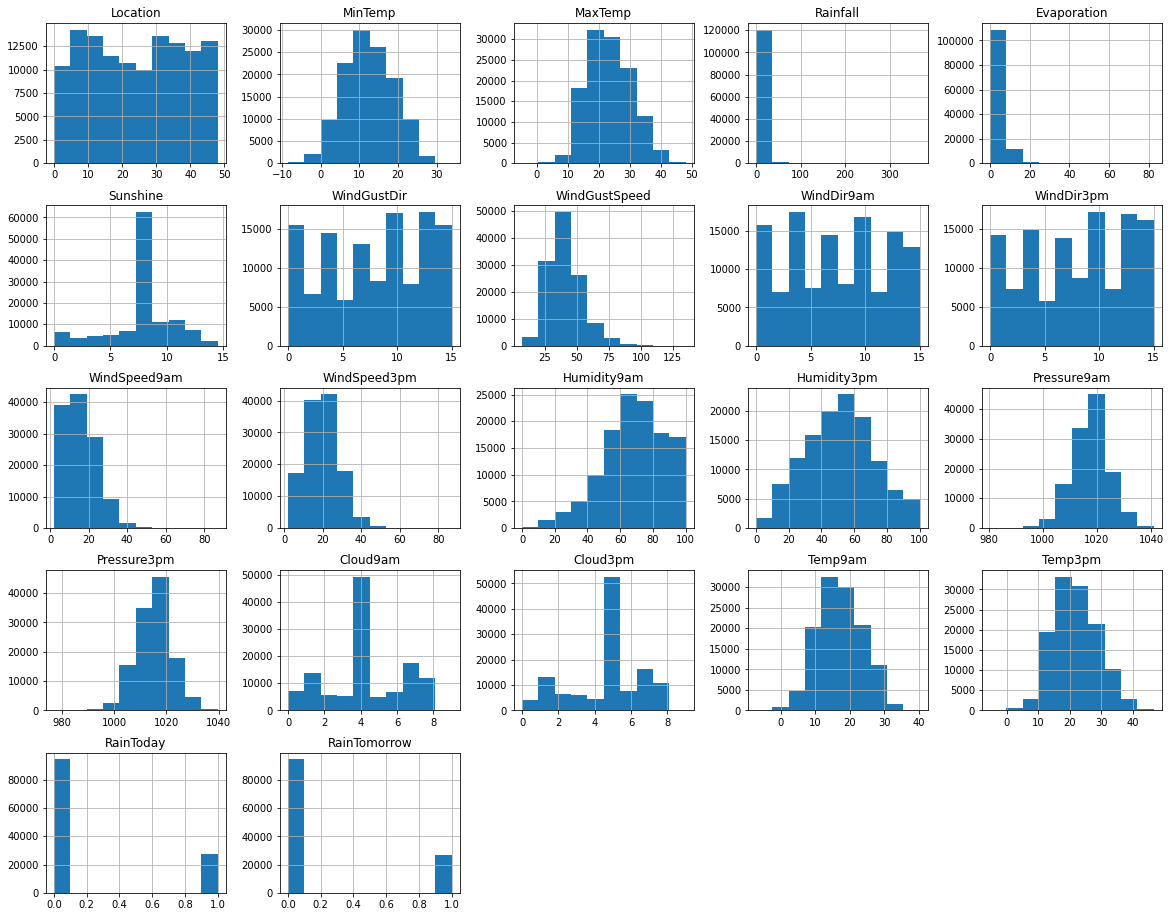

In [ ]:
df1.hist(figsize=(20,16))
plt.show()

In [ ]:
X = df1.drop(['RainTomorrow'], axis = 1)
y = df1['RainTomorrow']

<h3> Feature Scaling and Splitting </h3>

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [ ]:
models = {
    "Linear Regression": LinearRegression(fit_intercept=True),
    "KNN": KNeighborsClassifier(),
    "SVM" :SVC(),
    "Naive Bayes": GaussianNB(),
    "Decisiontree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(max_features='sqrt', random_state=5),
    "LogisticRegression": LogisticRegression()
}

for model in models.items():
    m = model[1]
    m.fit(X_train, y_train)
    print(model[0])
    print("Score: ", m.score(X_test,y_test))
    print("")

Linear Regression
Score:  0.3375380466422213

KNN
Score:  0.8396610614818707

SVM
Score:  0.859695218076721

Naive Bayes
Score:  0.8057343667892801

Decisiontree
Score:  0.792334471886495

RandomForest
Score:  0.8599251182343668

LogisticRegression
Score:  0.8502693116132423



In [28]:
from sklearn.metrics import make_scorer, accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(SVC(), X_train, y_train, cv=3)

confusion_matrix(y_train, y_train_pred)

array([[68375,  2778],
       [10186, 10003]])

As We can see random Forest give the best Prediction